## Stock_Market_Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# importing the dataset
data = pd.read_csv(r"D:\IITR\ML Project\Nexus\Stock Market Prediction\data\infolimpioavanzadoTarget.csv")

In [3]:
# having a breif overview of the data
data.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [4]:
data.shape

(7781, 1285)

In [5]:
# datatypes of different columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [6]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)

In [7]:
# Choosing relevant columns only for our model
df = data[['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'RSIadjclose15', 'RSIvolume15', 
                'high-15', 'K-15', 'D-15']]

In [8]:
df

,date,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,high-15,K-15,D-15
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,NaN,NaN,NaN,NaN,NaN
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,NaN,NaN,NaN,NaN,NaN
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,NaN,NaN,NaN,NaN,NaN
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,NaN,NaN,NaN,NaN,NaN
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,60.782255,47.081752,23.600000,26.223672,27.022465
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,62.022801,47.747952,23.610001,30.764722,28.003602
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,62.022801,48.713225,23.610001,30.764722,29.251039
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,67.186408,47.445460,23.740000,46.457382,35.995609


In [9]:
df.shape

(7781, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           7781 non-null   object 
 1   open           7781 non-null   float64
 2   high           7781 non-null   float64
 3   low            7781 non-null   float64
 4   close          7781 non-null   float64
 5   adjclose       7781 non-null   float64
 6   volume         7781 non-null   int64  
 7   RSIadjclose15  7316 non-null   float64
 8   RSIvolume15    7316 non-null   float64
 9   high-15        7347 non-null   float64
 10  K-15           7262 non-null   float64
 11  D-15           7194 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 729.6+ KB


In [11]:
# data statistics
df.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,high-15,K-15,D-15
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7347.000000,7262.000000,7194.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,37.947291,18.673824,18.704812
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,107.340294,75.723295,74.210933
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,0.510000,-668.212635,-626.263336
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,4.565000,6.153839,8.336837
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,10.640000,28.484828,28.478797
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,25.170000,59.688404,58.664021
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,799.359985,100.000000,100.000000


In [12]:
# Converting date column into datetime datatype
df['date'] = pd.to_datetime(df['date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_27104\3973666562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [13]:
# checking for date column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           7781 non-null   datetime64[ns]
 1   open           7781 non-null   float64       
 2   high           7781 non-null   float64       
 3   low            7781 non-null   float64       
 4   close          7781 non-null   float64       
 5   adjclose       7781 non-null   float64       
 6   volume         7781 non-null   int64         
 7   RSIadjclose15  7316 non-null   float64       
 8   RSIvolume15    7316 non-null   float64       
 9   high-15        7347 non-null   float64       
 10  K-15           7262 non-null   float64       
 11  D-15           7194 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 729.6 KB


In [14]:
# setting date column as index as its a time series data
df.set_index('date', inplace= True)

In [15]:
index_dtype = df.index.dtype
print(f"Index data type: {index_dtype}")

Index data type: datetime64[ns]


In [16]:
# Checking for duplicate data
print(df.duplicated().sum())

148


In [17]:
# remove any duplicate rows
df.drop_duplicates(keep=False, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27104\3265940022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep=False, inplace=True)


array([[<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'high'}>,
        <Axes: title={'center': 'low'}>],
       [<Axes: title={'center': 'close'}>,
        <Axes: title={'center': 'adjclose'}>,
        <Axes: title={'center': 'volume'}>],
       [<Axes: title={'center': 'RSIadjclose15'}>,
        <Axes: title={'center': 'RSIvolume15'}>,
        <Axes: title={'center': 'high-15'}>],
       [<Axes: title={'center': 'K-15'}>,
        <Axes: title={'center': 'D-15'}>, <Axes: >]], dtype=object)

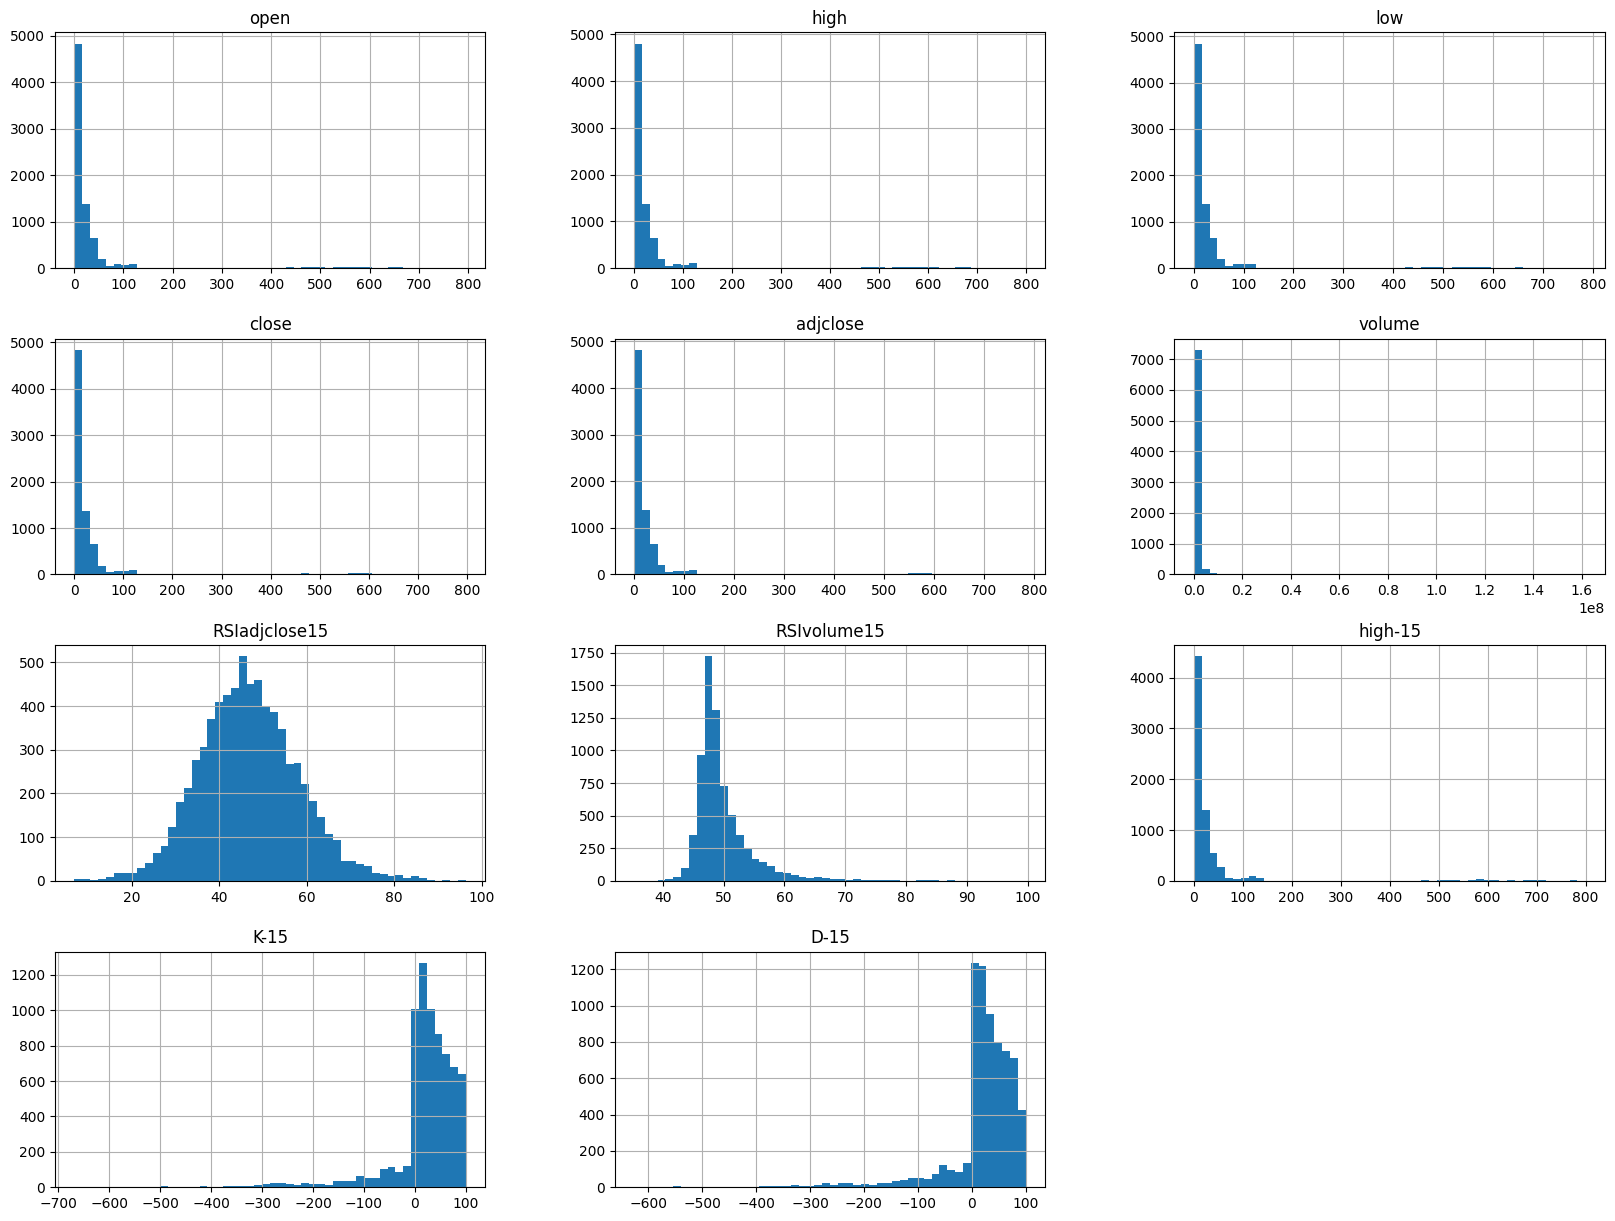

In [18]:
## checking for the range of values of each column
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

## Handling Missing Values

In [19]:
# looking for missing values
df.isnull().sum()

open               0
high               0
low                0
close              0
adjclose           0
volume             0
RSIadjclose15    447
RSIvolume15      447
high-15          416
K-15             419
D-15             487
dtype: int64

In [20]:
# filling missing values using backfill interpolation techniques for time series data
df.interpolate(method = 'bfill', inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27104\1791559356.py:2: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.interpolate(method = 'bfill', inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_27104\1791559356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method = 'bfill', inplace = True)


In [21]:
df

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,high-15,K-15,D-15
date,,,,,,,,,,,
2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,11.003380,57.100383,18.309999,13.812156,11.161508
2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,11.003380,57.100383,18.309999,13.812156,11.161508
2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,11.003380,57.100383,18.309999,13.812156,11.161508
2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,11.003380,57.100383,18.309999,13.812156,11.161508
2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,11.003380,57.100383,18.309999,13.812156,11.161508
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,60.782255,47.081752,23.600000,26.223672,27.022465
2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,62.022801,47.747952,23.610001,30.764722,28.003602
2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,62.022801,48.713225,23.610001,30.764722,29.251039


In [22]:
df.isnull().sum()

open             0
high             0
low              0
close            0
adjclose         0
volume           0
RSIadjclose15    0
RSIvolume15      0
high-15          0
K-15             0
D-15             0
dtype: int64

## Data Visualization

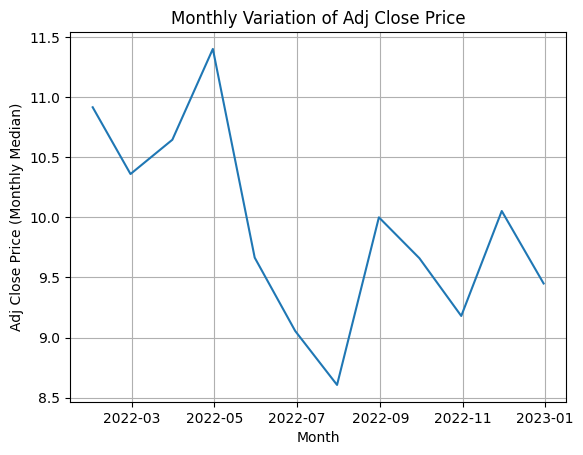

In [23]:
# Monthly variation of 'adjclose'

df_monthly = df['adjclose'].resample('ME').median()
plt.plot(df_monthly)
plt.xlabel('Month')
plt.ylabel('Adj Close Price (Monthly Median)')
plt.title('Monthly Variation of Adj Close Price')
plt.grid(True)
plt.show()

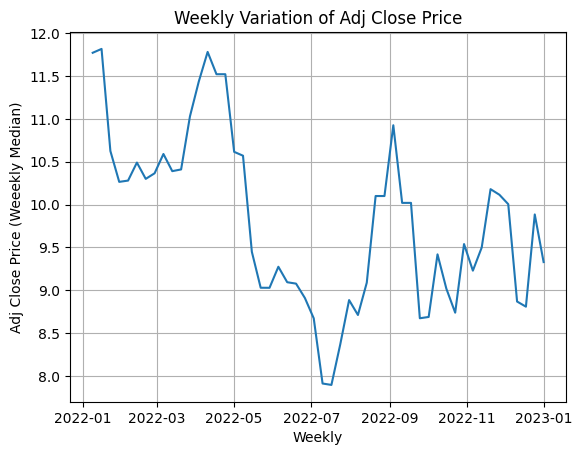

In [24]:
# Weekly variation of 'adjclose'

df_weekly = df['adjclose'].resample('W').median()
plt.plot(df_weekly)
plt.xlabel('Weekly')
plt.ylabel('Adj Close Price (Weeekly Median)')
plt.title('Weekly Variation of Adj Close Price')
plt.grid(True)
plt.show()

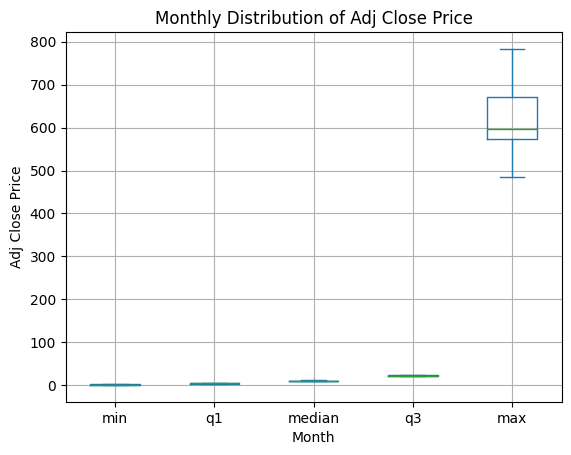

<Figure size 1200x600 with 0 Axes>

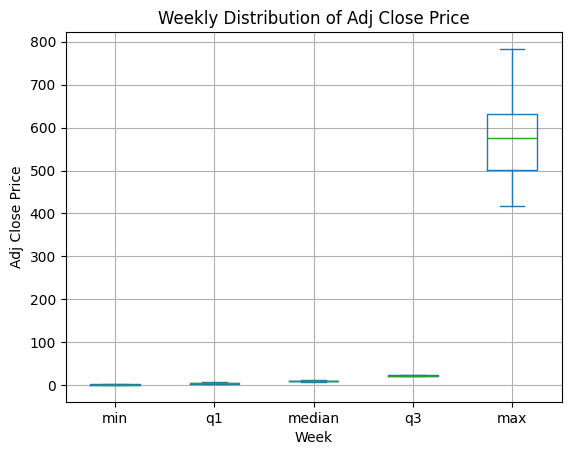

<Figure size 1200x600 with 0 Axes>

In [25]:
def q1(x):
  return x.quantile(0.25)

def q3(x):
  return x.quantile(0.75)

# resampling our data by monthly and weekly by taking other statistical values into account also
df_monthly_box = df.resample('ME')['adjclose'].agg(['min', 'quantile', q1, 'median', 'quantile', q3, 'max'])
df_weekly_box = df.resample('W')['adjclose'].agg(['min', 'quantile', q1, 'median', 'quantile', q3, 'max'])

# Plot monthly boxplot 
df_monthly_box.plot(kind='box')
plt.xlabel('Month')
plt.ylabel('Adj Close Price')
plt.title('Monthly Distribution of Adj Close Price')
plt.grid(True)

plt.figure(figsize=(12, 6))
plt.show()

# Plot weekly boxplot 
df_weekly_box.plot(kind='box')
plt.xlabel('Week')
plt.ylabel('Adj Close Price')
plt.title('Weekly Distribution of Adj Close Price')
plt.grid(True)
plt.figure(figsize=(12, 6))
plt.show()

## Handling Outliers

In [26]:
columns_to_check = ['open', 'high', 'low', 'close', 'adjclose', 'volume', 'RSIadjclose15',
                    'RSIvolume15', 'high-15', 'K-15', 'D-15'] 

for col in columns_to_check:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  upper_bound = q3 + 1.5 * iqr
  df = df[df[col] <= upper_bound]

In [27]:
df.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,high-15,K-15,D-15
count,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5.522000e+03,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000
mean,12.975895,13.221296,12.722472,12.955996,12.636886,2.377007e+05,46.078913,48.591610,14.287479,10.533085,10.316564
std,11.049473,11.211362,10.881092,11.045134,10.733854,3.676493e+05,10.863793,2.586403,11.883570,87.142601,86.191441
min,0.430000,0.436000,0.420000,0.420000,0.420000,0.000000e+00,7.260120,35.303213,0.510000,-668.212635,-626.263336
25%,4.000000,4.060000,3.950000,4.000000,3.909936,7.000000e+03,39.087557,47.002701,4.500000,5.036300,6.984991
50%,9.680000,9.880000,9.440000,9.650000,9.565449,4.170000e+04,46.059590,48.154706,10.400000,25.950021,26.338094
75%,21.895000,22.097500,21.307499,21.757500,20.860544,3.275750e+05,53.127578,49.882277,22.900000,54.545441,53.894392
max,47.119999,47.540001,46.485001,47.130001,46.568592,1.546400e+06,75.787732,55.980375,50.730000,100.000000,100.000000


## Train Test Splitting

In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 4417
Rows in test set: 1105



In [29]:
train_set.shape

(4417, 11)

In [30]:
test_set.shape

(1105, 11)

In [31]:
df.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,high-15,K-15,D-15
count,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5.522000e+03,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000
mean,12.975895,13.221296,12.722472,12.955996,12.636886,2.377007e+05,46.078913,48.591610,14.287479,10.533085,10.316564
std,11.049473,11.211362,10.881092,11.045134,10.733854,3.676493e+05,10.863793,2.586403,11.883570,87.142601,86.191441
min,0.430000,0.436000,0.420000,0.420000,0.420000,0.000000e+00,7.260120,35.303213,0.510000,-668.212635,-626.263336
25%,4.000000,4.060000,3.950000,4.000000,3.909936,7.000000e+03,39.087557,47.002701,4.500000,5.036300,6.984991
50%,9.680000,9.880000,9.440000,9.650000,9.565449,4.170000e+04,46.059590,48.154706,10.400000,25.950021,26.338094
75%,21.895000,22.097500,21.307499,21.757500,20.860544,3.275750e+05,53.127578,49.882277,22.900000,54.545441,53.894392
max,47.119999,47.540001,46.485001,47.130001,46.568592,1.546400e+06,75.787732,55.980375,50.730000,100.000000,100.000000


In [32]:
df_test = test_set.copy()

In [33]:
df_train = train_set.copy()

## Looking for Correlations

In [34]:
corr_matrix = df_train.corr()

In [35]:
corr_matrix['adjclose'].sort_values(ascending = False)

adjclose         1.000000
high             0.998578
close            0.998360
open             0.997675
low              0.997291
high-15          0.991342
RSIadjclose15    0.127479
RSIvolume15      0.043432
volume          -0.243249
K-15            -0.245201
D-15            -0.250540
Name: adjclose, dtype: float64

In [36]:
# importing libraries
import seaborn as sns

array([[<Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='high-15', ylabel='close'>],
       [<Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='high-15', ylabel='high'>],
       [<Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='high-15', ylabel='open'>],
       [<Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='high-15', ylabel='low'>],
       [<Axes: xlabel='close', ylabel='high-15'>,
        <Axes:

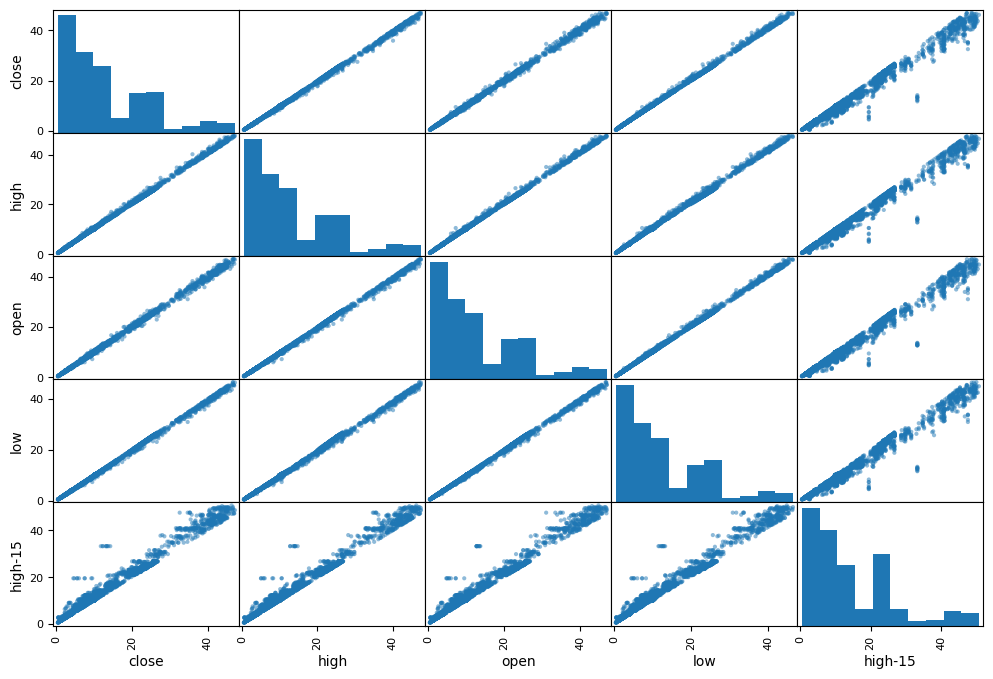

In [37]:
# visualizing relationship between different attributes that are strongly correlated with 'adjclose'

from pandas.plotting  import scatter_matrix
attributes = ["close", "high", "open", "low", "high-15"]
scatter_matrix(df_train[attributes], figsize = (12,8))

<Axes: xlabel='high', ylabel='low'>

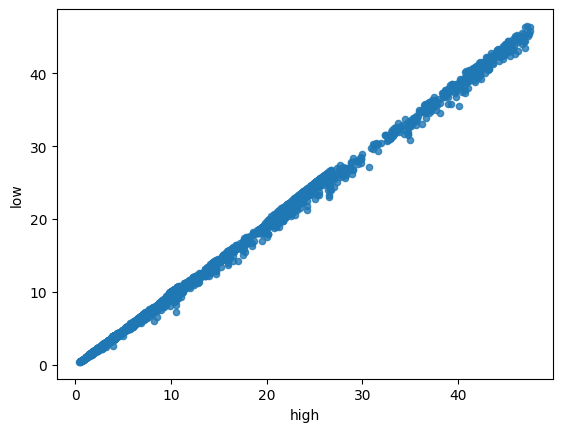

In [38]:
df_train.plot(kind = "scatter", x="high", y="low", alpha=0.8)

In [39]:
df.isnull().sum()

open             0
high             0
low              0
close            0
adjclose         0
volume           0
RSIadjclose15    0
RSIvolume15      0
high-15          0
K-15             0
D-15             0
dtype: int64

## Trying out attribute combinations

In [40]:
df_train['diff'] = df_train['high']-df_train['low']

In [41]:
# we got new attruibute that also shows good correlation with adjclose
corr_matrix = df_train.corr()
corr_matrix['adjclose'].sort_values(ascending = False)

adjclose         1.000000
high             0.998578
close            0.998360
open             0.997675
low              0.997291
high-15          0.991342
diff             0.644531
RSIadjclose15    0.127479
RSIvolume15      0.043432
volume          -0.243249
K-15            -0.245201
D-15            -0.250540
Name: adjclose, dtype: float64

<Axes: xlabel='diff', ylabel='adjclose'>

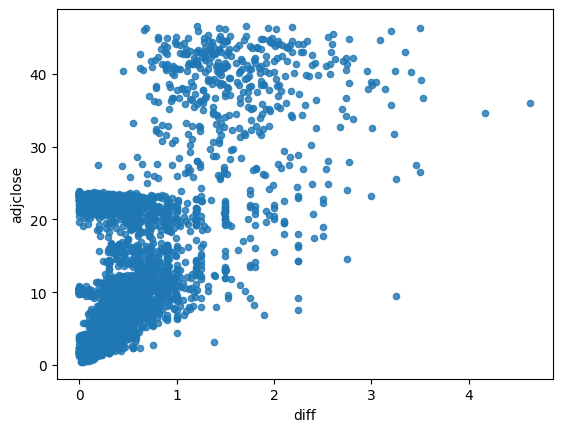

In [42]:
# visualization between correlation of new attribute and our target variable adjclose
df_train.plot(kind = "scatter", x="diff", y="adjclose", alpha=0.8)

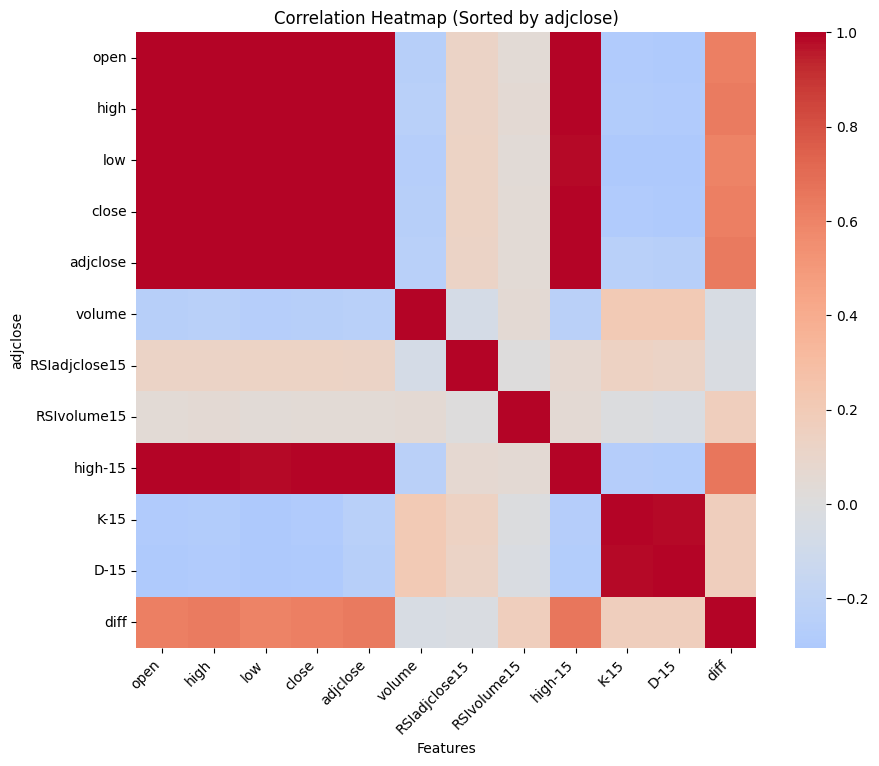

In [43]:
# Plotting correlations in heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, cmap="coolwarm", center=0)

plt.title("Correlation Heatmap (Sorted by adjclose)")
plt.xlabel("Features")
plt.ylabel("adjclose")
plt.xticks(rotation=45, ha="right")
plt.show()

In [44]:
# Training Dataset
X_train = df_train.drop(['adjclose'], axis=1)
Y_train = df_train['adjclose'].copy()

In [45]:
# new attribute for testing dataset
df_test['diff'] = df_test['high']-df_test['low']

In [46]:
# Testing Dataset
X_test = df_test.drop(['adjclose'], axis=1)
Y_test = df_test['adjclose'].copy()

## Creating a Pipeline

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std scaler', StandardScaler())
])

In [48]:
# Passing training dataset into our pipeline
X_tr = my_pipeline.fit_transform(X_train)

In [49]:
X_tr.shape

(4417, 11)

In [50]:
Y_train.shape

(4417,)

## Selecting a desired model and Evaluating it

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [52]:
# Using multiple models to find which gives best results
models={
    "Linear Regression":LinearRegression(),
    "Random Forest":RandomForestRegressor(),
    "Support Vector Machines":SVR()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_tr, Y_train) # Train model

    # Make predictions
    Y_train_pred = model.predict(X_tr)

    # Training set performance
    mse = mean_squared_error(Y_train, Y_train_pred)
    rmse = np.sqrt(mse)

    print(list(models.keys())[i])

 
    print('Model performance for Training set')
    print("- RMSE: {:.4f}".format(rmse))

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- RMSE: 0.2998


Random Forest
Model performance for Training set
- RMSE: 0.0510


Support Vector Machines
Model performance for Training set
- RMSE: 0.6571




## Using better evaluation technique - Cross Validation

In [53]:
# for better evaluation techniques we went for Cross_validation on training dataset having 10 folds
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
  # Perform cross-validation and calculate RMSE scores
  scores = cross_val_score(model, X_tr, Y_train, scoring="neg_mean_squared_error", cv=10)
  rmse_scores = np.sqrt(-scores)

  # Printing model name and average RMSE
  print(f"Model: {model_name}")
  print(f"Average RMSE: {rmse_scores.mean()}")
  print("-" * 30) 

Model: Linear Regression
Average RMSE: 0.30057366714622863
------------------------------
Model: Random Forest
Average RMSE: 0.13697081681672116
------------------------------
Model: Support Vector Machines
Average RMSE: 0.7474693437143862
------------------------------


## Testing the model on test data

In [54]:
# Finally testing our model on Testing Dataset and evaluating it using evaluation metrics used earlier

X_ts = my_pipeline.transform(X_test)

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Make predictions
    Y_test_pred = model.predict(X_ts)

    # Training set performance
    mse = mean_squared_error(Y_test, Y_test_pred)
    rmse = np.sqrt(mse)

    print(list(models.keys())[i])

 
    print('Model performance for Testing set')
    print("- RMSE: {:.4f}".format(rmse))

    print('='*35)
    print('\n')


Linear Regression
Model performance for Testing set
- RMSE: 0.2945


Random Forest
Model performance for Testing set
- RMSE: 0.1331


Support Vector Machines
Model performance for Testing set
- RMSE: 0.5694


